In [17]:
#%pip install numpy matplotlib scikit-learn pandas tensorflow

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from Data_Reader import MnistDataloader, show_result
from os.path import join

In [19]:
input_path = "input"
training_images_filepath = join(
    input_path, "train-images-idx3-ubyte/train-images.idx3-ubyte"
)
training_labels_filepath = join(
    input_path, "train-labels-idx1-ubyte/train-labels.idx1-ubyte"
)
test_images_filepath = join(input_path, "t10k-images-idx3-ubyte/t10k-images.idx3-ubyte")
test_labels_filepath = join(input_path, "t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte")

In [20]:
mnist_dataloader = MnistDataloader(
    training_images_filepath,
    training_labels_filepath,
    test_images_filepath,
    test_labels_filepath,
)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [21]:
x_train = np.array(x_train).reshape(-1, 28 * 28)
x_test = np.array(x_test).reshape(-1, 28 * 28)
y_train = np.array(y_train)
y_test = np.array(y_test)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


In [22]:
train_data = pd.DataFrame(x_train, columns=[f'pixel{i}' for i in range(x_train.shape[1])])
train_data['label'] = y_train
X = x_train
y = y_train

print("Shape of X after separating features:", X.shape)
print("Shape of y after separating labels:", y.shape)

Shape of X after separating features: (60000, 784)
Shape of y after separating labels: (60000,)


In [23]:
train_data.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [24]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (60000, 28, 28, 1)


In [25]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (60000, 10)


In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (48000, 28, 28, 1)
y_train shape: (48000, 10)
X_val shape: (12000, 28, 28, 1)
y_val shape: (12000, 10)


In [27]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # This defines the input shape correctly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9530 - loss: 0.1552 - val_accuracy: 0.9827 - val_loss: 0.0560
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9844 - loss: 0.0494 - val_accuracy: 0.9866 - val_loss: 0.0475
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9887 - loss: 0.0344 - val_accuracy: 0.9856 - val_loss: 0.0479
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9921 - loss: 0.0248 - val_accuracy: 0.9862 - val_loss: 0.0430
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9943 - loss: 0.0193 - val_accuracy: 0.9892 - val_loss: 0.0398
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9887 - val_loss: 0.0418
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9961 - loss: 0.0127 - val_accuracy: 0.9893 - val_loss: 0.0396
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9965 - loss

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0613
Validation Accuracy: 98.52%


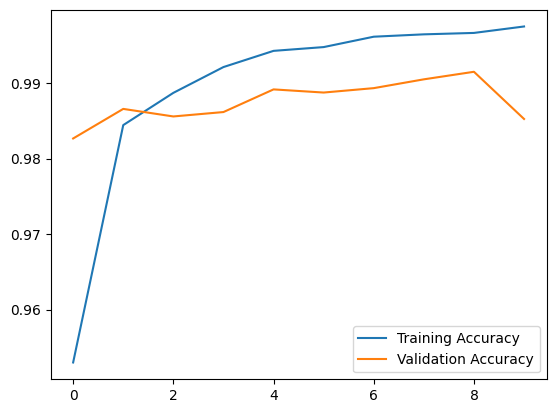

In [29]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [30]:
model.save('mnist_cnn_model.keras')

In [31]:
X_test = x_test / 255.0
print(X_test.shape)
X_test = X_test.reshape(-1, 28, 28, 1)
print("Shape of X_test after reshaping:", X_test.shape)


(10000, 784)
Shape of X_test after reshaping: (10000, 28, 28, 1)


In [32]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


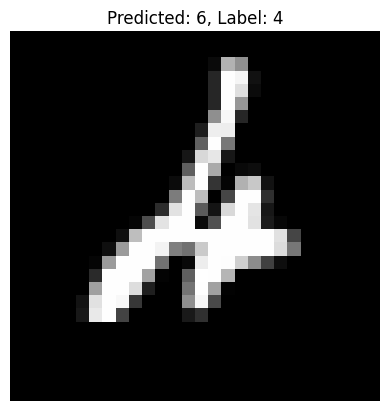

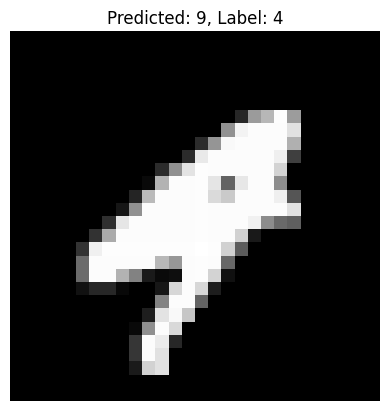

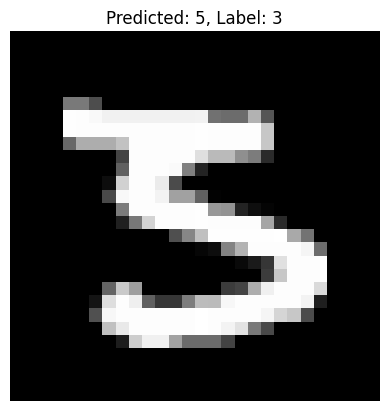

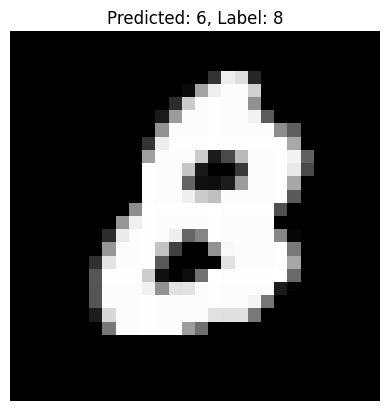

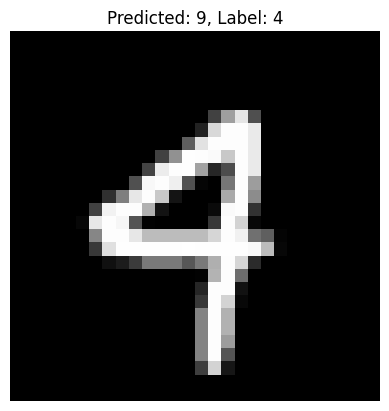

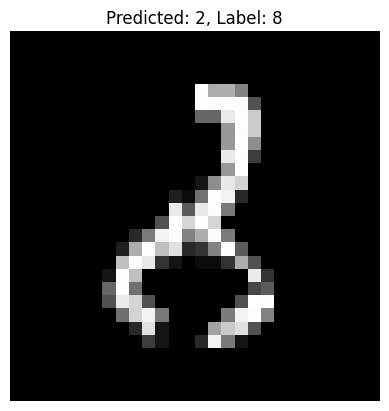

Number of wrong prediction: 134
Number of test sample: 10000


In [33]:
show_result(x_test, y_test, predicted_labels)
